#COVID
<font color='orange'>**If you attended the class in person, please don't forget to fill in [this form](https://docs.google.com/forms/d/e/1FAIpQLSfA7p1lxOhaXLw_2jO1OBvOzqheS0kjzm968S4uciXQKh5__g/viewform)**

# Performance measures

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #6

This colaboratory also contains **Homework #6** of the Machine Learning course, which is due **Dec 06, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.
**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:
* Please, submit only .ipynb that you extract from the colaboratory!
* Links to your colaboratory will not be accepted as a solution!
* Run your colab before submitting (no output - no grades).
* Do not change the description of tasks (even if there is a typo|mistake|etc).
* Remove unnecessary long prints after debugging.
* Each task should be solved right under the question of the task and not elsewhere.
* Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

In [40]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro (actually, no)
!pip install plotnine
from plotnine import *

In [41]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

## Example data

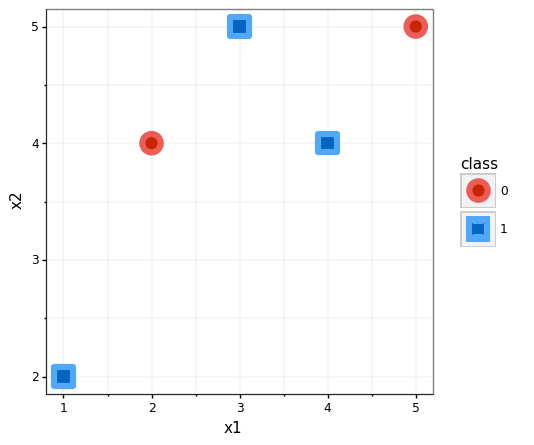

<ggplot: (-9223363275256001406)>

In [42]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(example_data)

# Accuracy
What is the accuracy of the random classifier (baseline) for the `example_data`? Is it 50% or more/less? To emulate the random choise we will use a bernoulli trial tossing a fair coing (50% probability of heads/tails) 5 times.

In [43]:
np.random.seed(1111)

##### YOUR CODE STARTS #####
random_pred = np.random.binomial(1,0.5,5)
##### YOUR CODE ENDS #####

acc = np.mean(example_data['class'] == random_pred)*100
print(f'accuracy is {acc}%')

accuracy is 20.0%


Seems very pessimistic, what if we repeat this many times, e.g. 1000?

In [44]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  random_preds[i] = np.mean(example_data['class'] == np.random.binomial(1, 0.5, 5))*100

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 50.16%


Here is an unbalanced case:

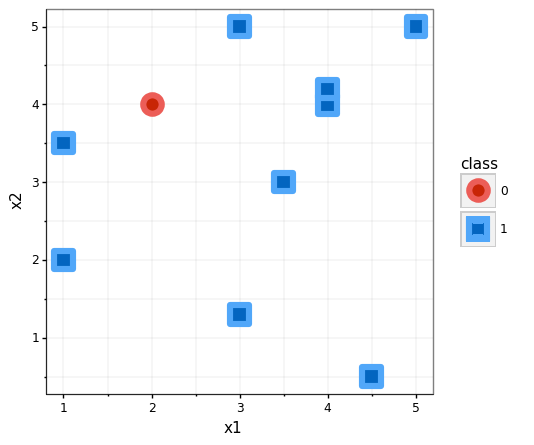

<ggplot: (-9223363275256008539)>

In [45]:
unbalanced_data = pd.DataFrame({'x1':[1,2,3,4,5,1,4,3,4.5,3.5], 'x2':[2,4,5,4,5,3.5,4.2,1.3,0.5,3], 'class':[1,0,1,1,1,1,1,1,1,1]})
unbalanced_data['class'] = unbalanced_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(unbalanced_data)

Since we increased the number of instances of the blue class, would the accuracy of the random classifier change?

In [46]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  random_preds[i] = np.mean(unbalanced_data['class'] == np.random.binomial(1, 0.5, 10))*100

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 50.15%


Instead of binomial trials we can use `DummyClassifier` from `sklearn` to do the same thing.

In [47]:
from sklearn.dummy import DummyClassifier
random_model = DummyClassifier(strategy='uniform')

In [48]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  ##### YOUR CODE STARTS #####
  random_model.fit(unbalanced_data[['x1','x2']],unbalanced_data[['class']])
  random_preds[i] = np.round(random_model.score(unbalanced_data[['x1','x2']],unbalanced_data[['class']]),2)*100
  ##### YOUR CODE ENDS #####

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 49.96%


But random classifier is not always a good baseline to compare with. As very often it is the majority class predictor who is taking over ML models.

In [49]:
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
print(f'{majority_class_model.score(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])*100}%')

90.0%


Cacluate recall and precision for this problem. Remind yourself that **recall** is `tp/(tp + fn)` and **precision** is `tp/(tp + fp)`. Where `tp` is true positives, `fn` is false negatives and `fp` is a false positives. What are the positives and negatives? In binary classification, **positives** and **negatives** are arbitrary entities. One of the classes could be called **positive** if it indicates **presence** of some desired (or undesired) outcome (it could be a purchase, disease, etc.). While **negatives** usually indicate absense of this outcome. In our case, since we have `1`-s and `0`-s, we will call `1`-s **positive**, while `0`-s **negatives**. Therefore, a `tp` (true positive) number would reflect the number of `1`-s we predicted as `1`-s etc. Now we are all setup to estimate **precision** and **recall**.

In [50]:
print(f'True classes for all points: {unbalanced_data[["class"]].to_numpy().flatten()}')

predictions = majority_class_model.predict(unbalanced_data[["x1" , "x2"]])
print(f'Predicted classes for all points: {np.array(predictions)}')

##### YOUR CODE STARTS #####
pred_positive = unbalanced_data[["class"]][predictions == 1].to_numpy().flatten()
print(f'Actual classes of points predicted positive: {pred_positive}')

# what are the actual classes of points predicted as negative?
pred_negative = unbalanced_data[["class"]][predictions == 0].to_numpy().flatten()
print(f'Actual classes of points predicted negative: {pred_negative}')
##### YOUR CODE ENDS #####

##### YOUR CODE STARTS #####
tp = np.sum(pred_positive==1)
fn = np.sum(pred_negative==1)
fp = np.sum(pred_positive==0)
tn = np.sum(pred_negative==0)
##### YOUR CODE ENDS #####

print(f'TP = {tp}, TN = {tn}, FN = {fn}, FP = {fp}')

True classes for all points: [1 0 1 1 1 1 1 1 1 1]
Predicted classes for all points: [1 1 1 1 1 1 1 1 1 1]
Actual classes of points predicted positive: [1 0 1 1 1 1 1 1 1 1]
Actual classes of points predicted negative: []
TP = 9, TN = 0, FN = 0, FP = 1


In [51]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)

print(f'Recall = {recall}, Precision = {precision}')

Recall = 1.0, Precision = 0.9


**Recall** is how many positives we have prediced as positives out of all positives that were in the data. **Precision** is how many true positives there were among all instances predicted as positive. If you feel that it is confusing, check out formulas again :)

## F1-score
It would be great to have just one number that combines both **precision** and **recall** to look at. Often people use **f1 score** to summarise both precision and recall. 

<center><font size = 6> $ F1 = 2\cdot\frac{(recall\cdot precision)}{(recall + precision)} $

In [52]:
f1 = 2*(recall*precision)/(recall + precision)
print(f'F1 score = {np.round(f1, 3)}')

F1 score = 0.947


F1-score is also known as Dice-coefficient.

In [53]:
# Dice coefficient/score
dice = 2*tp/(2*tp + fp + fn)
print(f'Dice score = {np.round(dice, 3)}')

Dice score = 0.947


F1-score calculated using *sklearn*

In [54]:
from sklearn.metrics import f1_score
f1_score(predictions, unbalanced_data['class'])

0.9473684210526316

**Exercise**: Switch the definitions of **positive** and **negative** and recalculate the precision, recall, f1-score and dice coefficient as if class 0 was considered **positive**. (no need to reverse the `class` variable). Are F1-score and Dice are stil the same?

In [55]:
predictions # 1 is associated with a negative class now

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
##### YOUR CODE STARTS #####
pred_positive = unbalanced_data[["class"]][predictions == 0].to_numpy().flatten()
print(f'Actual classes of points predicted positive: {pred_positive}')

pred_negative = unbalanced_data[["class"]][predictions == 1].to_numpy().flatten()
print(f'Actual classes of points predicted negative: {pred_negative}')
##### YOUR CODE ENDS #####

##### YOUR CODE STARTS #####
tp = np.sum(pred_positive == 0)
fn = np.sum(pred_negative == 0)
fp = np.sum(pred_positive == 1)
tn = np.sum(pred_negative == 1)
##### YOUR CODE ENDS #####

print(f'TP = {tp}, TN = {tn}, FN = {fn}, FP = {fp}')

Actual classes of points predicted positive: []
Actual classes of points predicted negative: [1 0 1 1 1 1 1 1 1 1]
TP = 0, TN = 9, FN = 1, FP = 0


In [57]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)

print(f'Recall = {recall}, Precision = {precision}')

Recall = 0.0, Precision = nan


In [58]:
f1 = 2*recall*precision/(precision + recall)
print(f'F1 score = {f1}')

F1 score = nan


In [59]:
# Dice coefficient/score
dice = 2*tp/(2*tp + fp + fn)
print(f'Dice score = {dice}')

Dice score = 0.0


### All you need is a `classification_report` function from sklearn

In [60]:
from sklearn.metrics import classification_report
print(classification_report(unbalanced_data['class'], predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10





---

## Homework exercise 1: compute macro and weighted averages for precision, recall and f1-score (5 points)


<font color='red'> In this exercise we will start with training a logistic regression on small toy dataset we have created in the class. Next, you will calculate ordinary recall, precision and f1 measures and their macro- and weighted average versions. Learn more about macro and weighted averages here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  </font> 


In [77]:
# regenerate data:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories

In [78]:
# train a classifier
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()
logit.fit(example_data[['x1', 'x2']], example_data[['class']])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# predicting on train
predictions = logit.predict(example_data[['x1', 'x2']]) 

<font color='red'>  **(Homework exercise 1- a)** Fill in the gaps to complete a function that calculates `tp`, `fn`, `fp`, `tn` depending on which class is considered to be `positive`.  **(1 point)**</font> 

In [80]:
import math

def compute_confusion_stats(classes, positive_class, negative_class):
  ##### YOUR CODE STARTS #####
  pred_positive = classes[predictions == positive_class].to_numpy().flatten()
  pred_negative = classes[predictions == negative_class].to_numpy().flatten()

  tp = np.sum(pred_positive==positive_class)
  fn = np.sum(pred_negative==positive_class)
  fp = np.sum(pred_positive==negative_class)
  tn = np.sum(pred_negative==negative_class)
  ##### YOUR CODE ENDS #####
  
  return (tp, fn, fp, tn)

def compute_rec_prec_f1(tp, fn, fp, tn):
  recall = tp/(tp + fn)
  precision = tp/(tp + fp)
  f1 = 2*recall*precision/(precision + recall)
  if math.isnan(f1):
    f1 = 0
  return (recall, precision, f1)

<font color='red'>  **(Homework exercise 1- b)** Compute `tp`, `fn`, `fp`, `tn` and `recall`, `precision` and `f1` measures using functions `compute_confusion_stats` and `compute_rec_prec_f1` above. `recall`, `precision` and `f1` should be computed for both classes, e.g. `recall_1` is a recall when the first class is considered to be positive, `recall_0` is a recall when the second class is regarded as positive. **(1 point)**</font> 




In [81]:
# The first class is considered positive
##### YOUR CODE STARTS #####
(tp, fn, fp, tn) = compute_confusion_stats(example_data[["class"]],1,0)
recall_1, precision_1, f1_1 = compute_rec_prec_f1(tp, fn, fp, tn)
##### YOUR CODE ENDS #####

print(f'Recall for the first class = {recall_1}')
print(f'Precision for the first class = {precision_1}')
print(f'F1 score for the first class = {f1_1}')

Recall for the first class = 1.0
Precision for the first class = 0.75
F1 score for the first class = 0.8571428571428571


In [82]:
# The second class is considered positive
##### YOUR CODE STARTS #####
(tp, fn, fp, tn) = compute_confusion_stats(example_data[["class"]],0,1)
recall_0, precision_0, f1_0 = compute_rec_prec_f1(tp, fn, fp, tn)
##### YOUR CODE ENDS #####

print(f'Recall for the second class = {recall_0}')
print(f'Precision for the second class = {precision_0}')
print(f'F1 score for the second class = {f1_0}')

Recall for the second class = 0.5
Precision for the second class = 1.0
F1 score for the second class = 0.6666666666666666


<font color='red'>  **(Homework exercise 1- c)** Compute weighted `recall`, `precision` and `f1` measures for each class. **(1.5 points)**</font> 

In [83]:
##### YOUR CODE STARTS #####
weight_1 = 3/5
recall_1_weighted = recall_1*weight_1
precision_1_weighted = precision_1*weight_1
f1_1_weighted = f1_1*weight_1
##### YOUR CODE ENDS #####
print(f'Weighted recall for the first class = {recall_1_weighted}')
print(f'Weighted precision for the first class = {precision_1_weighted}')
print(f'Weighted F1 score for the first class = {f1_1_weighted}')

##### YOUR CODE STARTS #####
weight_0 = 2/5
recall_0_weighted = recall_0*weight_0
precision_0_weighted = precision_0*weight_0
f1_0_weighted = f1_0*weight_0
##### YOUR CODE ENDS #####
print(f'Weighted recall for the second class = {recall_0_weighted}')
print(f'Weighted precision for the second class = {precision_0_weighted}')
print(f'Weighted F1 score for the second class = {f1_0_weighted}')

Weighted recall for the first class = 0.6
Weighted precision for the first class = 0.44999999999999996
Weighted F1 score for the first class = 0.5142857142857142
Weighted recall for the second class = 0.2
Weighted precision for the second class = 0.4
Weighted F1 score for the second class = 0.26666666666666666


<font color='red'>  **(Homework exercise 1- d)** Calculate macro and weighted averages. **(1.5 points)**</font> 

In [84]:
##### YOUR CODE STARTS #####
from sklearn.metrics import recall_score

macro_avg_precision = (precision_0+precision_1)/2
print(f'Macro averaging for precision = {np.round(macro_avg_precision,2)}')

macro_avg_recall = (recall_0+recall_1)/2
print(f'Macro averaging for recall = {np.round(macro_avg_recall,2)}')

macro_avg_f1 = (f1_0+f1_1)/2
print(f'Macro averaging for f1 = {np.round(macro_avg_f1,2)}')
##### YOUR CODE ENDS #####

Macro averaging for precision = 0.88
Macro averaging for recall = 0.75
Macro averaging for f1 = 0.76


In [86]:
##### YOUR CODE STARTS #####
weighted_avg_precision = (precision_0_weighted + precision_1_weighted)
print(f'Weighted averaging for precision = {np.round(weighted_avg_precision,2)}')

weighted_avg_recall = (recall_0_weighted + recall_1_weighted)
print(f'Weighted averaging for recall = {np.round(weighted_avg_recall,2)}')

weighted_avg_f1 = (f1_0_weighted + f1_1_weighted)
print(f'Weighted averaging for f1 = {np.round(weighted_avg_f1,2)}')
##### YOUR CODE ENDS #####

Weighted averaging for precision = 0.85
Weighted averaging for recall = 0.8
Weighted averaging for f1 = 0.78


<font color='red'>  Compare all your results with the output of `classification_report` function. Make sure they are the same. </font> 

In [70]:
from sklearn.metrics import classification_report
print(classification_report(example_data['class'], predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



# Confusion matrix
All the values we have calculated so far can be representated as a matrix. We have already seen a confusion matrix before when using **fast.ai** library.

In [87]:
# let's recalculate our majority class classifier
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
predictions = majority_class_model.predict(unbalanced_data[["x1" , "x2"]])

As usual, *sklearn* has our backs :)

In [88]:
from sklearn import metrics
metrics.confusion_matrix(unbalanced_data['class'], predictions)

array([[0, 1],
       [0, 9]])

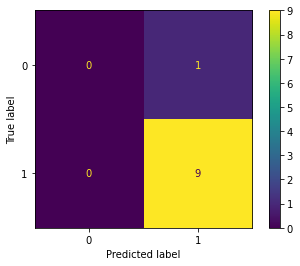

In [89]:
import matplotlib as plt
metrics.plot_confusion_matrix(majority_class_model, unbalanced_data[['x1', 'x2']], unbalanced_data['class'])

## ROC/AUC
Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC) are some of the most popular performance metrics in machine learning. Here we will practice calculating and visualising ROC/AUC for toy classifier.

In [90]:
# let's create our data again
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories

Train a logistic regression model from *sklearn* on our data

In [91]:
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()
logit.fit(example_data[['x1', 'x2']], example_data[['class']])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here we will use function `predict_proba` which returns probability scores for each class.

In [92]:
predictions = logit.predict(example_data[['x1', 'x2']])
print(predictions)

predictions_proba = logit.predict_proba(example_data[['x1', 'x2']])
print(predictions_proba)

[1 1 1 1 0]
[[0.18637182 0.81362818]
 [0.34969782 0.65030218]
 [0.47317578 0.52682422]
 [0.43161108 0.56838892]
 [0.5591435  0.4408565 ]]


In [93]:
print(predictions_proba[:,1]) # probabilities of positive class

[0.81362818 0.65030218 0.52682422 0.56838892 0.4408565 ]


Let's visualise these probability scores.

In [94]:
 def generate_grid(start, stop, ppu):
  """
  Function that creates data for the 
  decision boundary visualisation. 
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [95]:
start = 1 
stop = 5
ppu = 30 # points per unit

grid_data = generate_grid(start, stop, ppu)
grid_data['logit'] = logit.predict(grid_data[['x1', 'x2']]) # DEL

print(grid_data.shape)

(14400, 3)


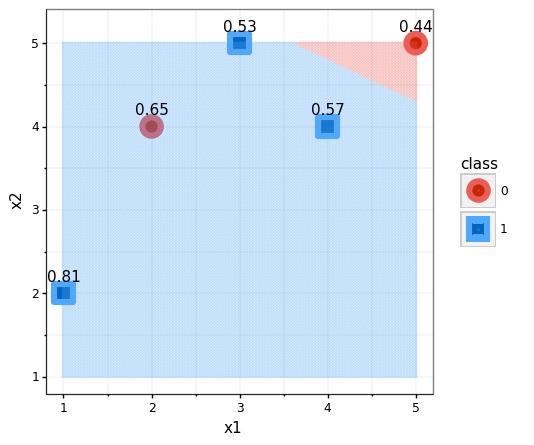

<ggplot: (-9223363275266783137)>

In [96]:
example_data['scores'] = np.round(predictions_proba[:,1], 2)
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(logit)'),  size = .5, alpha = 0.2) + geom_text(aes(label = example_data['scores']), nudge_y = 0.2)

In [97]:
example_data

,x1,x2,class,scores
0,1,2,1,0.81
1,2,4,0,0.65
2,3,5,1,0.53
3,4,4,1,0.57
4,5,5,0,0.44


Sort the dataframe in descending order based on class scores

In [98]:
example_data = example_data.sort_values('scores',  ascending=False)
example_data

,x1,x2,class,scores
0,1,2,1,0.81
1,2,4,0,0.65
3,4,4,1,0.57
2,3,5,1,0.53
4,5,5,0,0.44


What are the possible thresholds in this case?

In [99]:
thresholds = example_data['scores'].unique()
print(example_data['scores'].unique())

[0.81 0.65 0.57 0.53 0.44]


For each possible threshold compute True Positive Rate (TPR) and False Positive Rate (FPR) and record them in the separate dataframe.

In [100]:
roc_coordinates = pd.DataFrame(columns=['FPR','TPR'], index=thresholds)
print(roc_coordinates)

      FPR  TPR
0.81  NaN  NaN
0.65  NaN  NaN
0.57  NaN  NaN
0.53  NaN  NaN
0.44  NaN  NaN


In [101]:
for threshold in thresholds:
  print(f'For threshold {threshold}')
  
  ##### YOUR CODE STARTS #####
  predictions = (example_data[['scores']] >= threshold).to_numpy().flatten()
  pred_positive = example_data[['class']][predictions == 1].to_numpy().flatten()
  pred_negative = example_data[['class']][predictions == 0].to_numpy().flatten()
  ##### YOUR CODE ENDS #####
  
  tp = np.sum(pred_positive == 1)
  fn = np.sum(pred_negative == 1)
  tn = np.sum(pred_negative == 0)
  fp = np.sum(pred_positive == 0)

  print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
  
  ##### YOUR CODE STARTS #####
  tpr = tp/(tp+fn)# the same as recall
  fpr = fp/(tn+fp)

  ##### YOUR CODE ENDS #####
  
  print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
  roc_coordinates.loc[threshold] = pd.Series({'FPR':np.round(fpr,2), 'TPR':np.round(tpr,2)})

print(roc_coordinates)

For threshold 0.81
tp = 1, fn = 2, tn = 2, fp = 0
FPR = 0.0, TPR = 0.33

For threshold 0.65
tp = 1, fn = 2, tn = 1, fp = 1
FPR = 0.5, TPR = 0.33

For threshold 0.57
tp = 2, fn = 1, tn = 1, fp = 1
FPR = 0.5, TPR = 0.67

For threshold 0.53
tp = 3, fn = 0, tn = 1, fp = 1
FPR = 0.5, TPR = 1.0

For threshold 0.44
tp = 3, fn = 0, tn = 0, fp = 2
FPR = 1.0, TPR = 1.0

      FPR   TPR
0.81    0  0.33
0.65  0.5  0.33
0.57  0.5  0.67
0.53  0.5     1
0.44    1     1


Let's also add point FPR = 0, TPR = 0 with threshold 1.0

In [166]:
# Concat with old DataFrame and reset the Index.
top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
print(roc_coordinates)
final_roc_coordinates = pd.concat([top_row, roc_coordinates])
print(final_roc_coordinates)

      FPR   TPR
0.81    0  0.33
0.65  0.5  0.33
0.57  0.5  0.67
0.53  0.5     1
0.44    1     1
      FPR   TPR
1.00    0     0
0.81    0  0.33
0.65  0.5  0.33
0.57  0.5  0.67
0.53  0.5     1
0.44    1     1


In [103]:
final_roc_coordinates.dtypes

FPR    object
TPR    object
dtype: object

In [104]:
# convert all values in data frame into floats
final_roc_coordinates = final_roc_coordinates.astype('float') 
final_roc_coordinates

,FPR,TPR
1.00,0.0,0.00
0.81,0.0,0.33
0.65,0.5,0.33
0.57,0.5,0.67
0.53,0.5,1.00
0.44,1.0,1.00


Let's visualise our ROC curve:

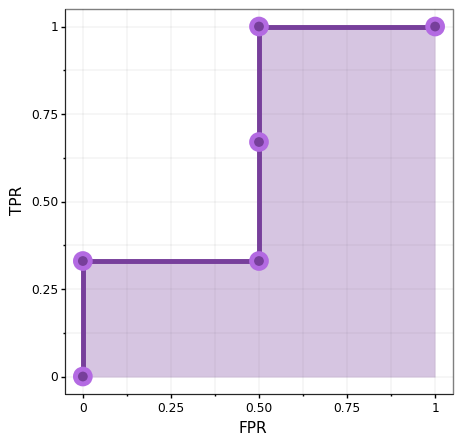

<ggplot: (8761587946090)>

In [105]:
fig = (
    ggplot(data = final_roc_coordinates,
          mapping = aes(x = 'FPR', y = 'TPR')) +
     geom_polygon(data = pd.concat([final_roc_coordinates, pd.DataFrame({'FPR':1, 'TPR':0}, index=[1.0])]), alpha = 0.3, fill = '#773F9B') + 
     geom_path(aes(x='FPR', y='TPR'), group=1, colour = '#773F9B', size = 2) +
     geom_point(colour = '#B36AE2', 
                shape = 'o',
                fill = '#773F9B', 
                size = 4.0,
                stroke = 2.0) +
    labs(
        title ='',
        x = 'FPR',
        y = 'TPR',
    ) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
    )
fig

Let's calculate **AUC** using *sklearn*:

In [106]:
np.round(metrics.roc_auc_score(example_data['class'], example_data['scores']),3)

0.667

### ROC for majority class classifier
Let's see how ROC would look like in the case of highly skewed prediction on unbalanced data.


In [107]:
# regenerate unbalanced data
unbalanced_data = pd.DataFrame({'x1':[1,2,3,4,5,1,4,3,4.5,3.5], 'x2':[2,4,5,4,5,3.5,4.2,1.3,0.5,3], 'class':[1,0,1,1,1,1,1,1,1,1]})
unbalanced_data['class'] = unbalanced_data['class'].astype('category') # note that we turn class into categories

Extract scores from the majority class model on unbalanced data

In [108]:
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [109]:
majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])[:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [110]:
unbalanced_data['scores'] = majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])[:,1]
unbalanced_data

,x1,x2,class,scores
0,1.0,2.0,1,1.0
1,2.0,4.0,0,1.0
2,3.0,5.0,1,1.0
3,4.0,4.0,1,1.0
4,5.0,5.0,1,1.0
5,1.0,3.5,1,1.0
6,4.0,4.2,1,1.0
7,3.0,1.3,1,1.0
8,4.5,0.5,1,1.0
9,3.5,3.0,1,1.0


In [112]:
def generate_coordinates(scores, classes, verbose = True):
  # thresholds can be obtained from scores
  thresholds = scores.unique()
  
  # initialise roc_coordinates
  roc_coordinates = pd.DataFrame(columns=['FPR','TPR'], index=thresholds)
  
  ##### YOUR CODE STARTS #####
  for threshold in thresholds:
    if (verbose == True):
      print(f'For threshold {threshold}')
    
      predictions = (scores >= threshold).to_numpy().flatten()
      pred_positive = classes[predictions == 1].to_numpy().flatten()
      pred_negative = classes[predictions == 0].to_numpy().flatten()
    
      tp = np.sum(pred_positive == 1)
      fn = np.sum(pred_negative == 1)
      tn = np.sum(pred_negative == 0)
      fp = np.sum(pred_positive == 0)
    
    if (verbose == True):
      print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
    
    tpr = tp/(tp+fn)# the same as recall
    fpr = fp/(tn+fp)
    
    if (verbose == True):
      print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
    roc_coordinates.loc[threshold] = pd.Series({'FPR':np.round(fpr,2),'TPR':np.round(tpr,2)})

  ##### YOUR CODE ENDS #####
  return roc_coordinates

In [113]:
dummy_roc_coordinates = generate_coordinates(unbalanced_data['scores'], unbalanced_data['class'])

For threshold 1.0
tp = 9, fn = 0, tn = 0, fp = 1
FPR = 1.0, TPR = 1.0



In [114]:
# Concat with old DataFrame and reset the Index.
top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
final_dummy_roc_coordinates = pd.concat([top_row, dummy_roc_coordinates])
print(final_dummy_roc_coordinates)

    FPR TPR
1.0   0   0
1.0   1   1


In [115]:
# convert all values in data frame into floats
final_dummy_roc_coordinates = final_dummy_roc_coordinates.astype('float') 
final_dummy_roc_coordinates

,FPR,TPR
1.0,0.0,0.0
1.0,1.0,1.0


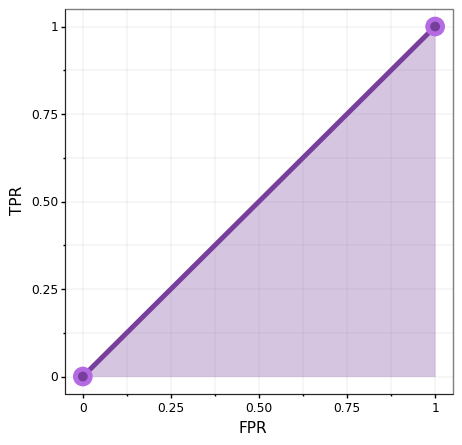

<ggplot: (8761587888662)>

In [116]:
fig = (
    ggplot(data = final_dummy_roc_coordinates,
          mapping = aes(x = 'FPR', y = 'TPR')) +
     geom_polygon(data = pd.concat([final_dummy_roc_coordinates, pd.DataFrame({'FPR':1, 'TPR':0}, index=[1.0])]), alpha = 0.3, fill = '#773F9B') + 
     geom_path(aes(x='FPR', y='TPR'), group=1, colour = '#773F9B', size = 2) +
     geom_point(colour = '#B36AE2', 
                shape = 'o',
                fill = '#773F9B', 
                size = 4.0,
                stroke = 2.0) +
    labs(
        title ='',
        x = 'FPR',
        y = 'TPR',
    ) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
    )
fig

In [117]:
np.round(metrics.roc_auc_score(unbalanced_data['class'], unbalanced_data['scores']),3)

0.5

## You can compare classifiers by plotting their ROCs

In [118]:
def plot_roc(coordinates_dict):
  """
  plot_roc function plots all models' ROCs on one plot
  """
  plotting_data = pd.DataFrame(columns=['FPR', 'TPR', 'Method'])

  for id, name in enumerate(coordinates_dict.keys()):
    method_data = coordinates_dict[name]
    method_data['Method'] = name
    plotting_data = pd.concat([plotting_data, method_data])
  
  plotting_data['Method'] = pd.Categorical(plotting_data['Method'])
  
  # To those of you who are interested in what the hell is going on
  # check the comments for each line:
  roc_plot = (
        ggplot(data = plotting_data, # creates a canvas
        mapping = aes(x = 'FPR', y = 'TPR', colour = 'Method')) + # specifies dimensions
        geom_path(size = 1.5) + # determines geometric primitive to be visualised (path/line in our case) and its thickness 
        labs(title ='', x = 'FPR', y = 'TPR') + # labels of the x and y axes
        # this is all for the figure, beloow are only formatting specs
        theme_bw() + # colour schema 
        theme(figure_size = (5, 5), # figure size
              axis_line = element_line(size = 0.5, colour = "black"), 
              panel_grid_major = element_line(size = 0.05, colour = "black"),
              panel_grid_minor = element_line(size = 0.05, colour = "black"),
              axis_text = element_text(colour ='black')) # more formatting details 
      )
  return roc_plot


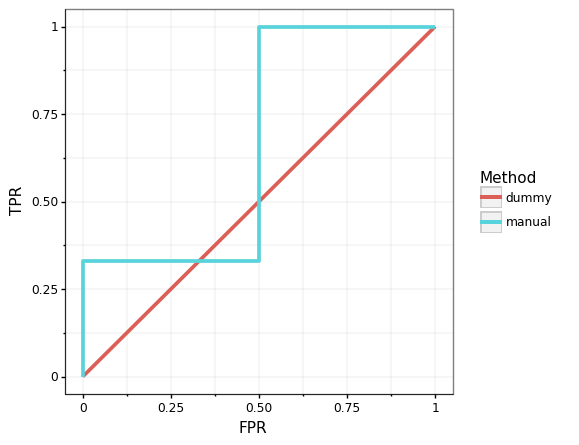

<ggplot: (-9223363275264109140)>

In [119]:
plot_roc(dict({'dummy': final_dummy_roc_coordinates,
               'manual': final_roc_coordinates}))

### ROC in Sklearn 

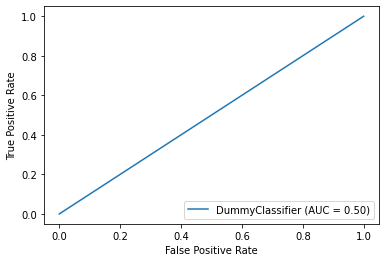

In [120]:
from sklearn.metrics import plot_roc_curve

# No predictions are required only the model object
metrics.plot_roc_curve(majority_class_model, unbalanced_data[['x1','x2']], unbalanced_data['class']) 



---

## Homework exercise 2: compare multiple classification methods using ROC curves and AUC metrics (5 points)


<font color='red'> In this exercise we will explore the value of using ROC/AUC metrics for evaluating the performance on an unbalanced synthetic data. </font> 



In [121]:
def create_unbalanced_random_2c_data (D, N):
  """
  Function create_unbalanced_random_2c_data generates two sets of D dimensional 
  points, one for each class. The first set has N points, the other one has N/10 
  points. The first set is sampled from D dimensional Gaussian distribution with 
  mean 0 and standard deviation 1. The second set is generated from the 
  distribution, with mean 1 and standard deviation 1.
  """
  # Generating N points for the first class
  mu_vec1 = np.zeros(D) # creates a vector of zeros, these are averages across each dimension
  cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
  class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N)

  # Another class with fewer points and with averages shifted into 1
  mu_vec2 = np.ones(D) # creates a vector of ones
  cov_mat2 = np.eye(D)
  class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, int(N/10))

  # a lot of boring things....
  # gluing together two matrices generated above
  unbalanced_data = pd.DataFrame(np.concatenate((class1_sample, class2_sample)))

  # Create names for columns
  unbalanced_data.columns = [ 'x' + str(i) for i in (np.arange(D)+1)]

  # Create a class column
  unbalanced_data['class'] = np.concatenate((np.repeat(0, N), np.repeat(1, int(N/10))))

  # This is important for plotting and modelling
  unbalanced_data['class'] = unbalanced_data['class'].astype('category')

  return unbalanced_data

In [129]:
from sklearn.model_selection import train_test_split
np.random.seed(2342347823)

D = 2 # two dimensions
N = 200 # points in majority class

unbalanced_data = create_unbalanced_random_2c_data(D, N)

# Randomly splitting data into train (60%) and validation (40%)
train, val = train_test_split(unbalanced_data, random_state = 111, test_size = 0.40) 
print(train)

           x1        x2 class
22  -0.806643 -0.859542     0
79  -2.095889 -0.418547     0
120 -1.213437  0.146685     0
45   0.320224  1.343128     0
100  1.120413 -1.095159     0
..        ...       ...   ...
86   0.185284  1.289590     0
217  0.679128  0.255686     1
212  1.618288  1.302383     1
108 -0.197094 -0.030133     0
84  -0.320766  0.673503     0

[132 rows x 3 columns]


<font color='red'>  **(Homework exercise 2- a)** Train three models (decision tree, KNN and random forest) on the synthetic data that we have generated above.  **(0.5 points)**</font> 

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1111) # random seed for consistency

##### YOUR CODE STARTS #####
# define all three classifiers using default parameters
knn = KNeighborsClassifier(n_neighbors = 7)
rfc = RandomForestClassifier()
dtr = DecisionTreeClassifier(random_state=0)


# train classifiers
#KNN
knn.fit(train[['x1','x2']], train[['class']])
predictions_knn = knn.predict(val[['x1','x2']])

#Random forest
rfc.fit(train[['x1','x2']], train[['class']])
predictions_rfc = rfc.predict(val[['x1','x2']])

#Decision tree
dtr.fit(train[['x1','x2']], train[['class']])
predictions_dtr = dtr.predict(val[['x1','x2']])

##### YOUR CODE ENDS #####

<font color='red'>  **(Homework exercise 2- b)** Calculate accuracy for each model on validation set using function `score` and model objects. **(0.5 points)**</font> 

In [183]:
##### YOUR CODE STARTS #####
print(f"Accuracy of DT is {np.round(metrics.accuracy_score(val[['class']], predictions_dtr),2)*100}%")
print(f"Accuracy of KNN is {np.round(metrics.accuracy_score(val[['class']], predictions_knn),2)*100}%")
print(f"Accuracy of RF is {np.round(metrics.accuracy_score(val[['class']], predictions_rfc),2)*100}%")
##### YOUR CODE ENDS #####

Accuracy of DT is 84.0%
Accuracy of KNN is 90.0%
Accuracy of RF is 85.0%


<font color='red'>  **(Homework exercise 2- c)** Get probability scores for the positive class on the validation data. **(0.5 points)**</font> 

In [152]:
##### YOUR CODE STARTS #####
val['DT'] = dtr.predict_proba(val[['x1', 'x2']])[:,1]
val['KNN'] = knn.predict_proba(val[['x1', 'x2']])[:,1]
val['RF'] = rfc.predict_proba(val[['x1', 'x2']])[:,1] # first values for RF should be 0.89, 0.84, 0.69 ...

print(val['RF'].sort_values(ascending = False))
##### YOUR CODE ENDS #####

218    0.89
214    0.84
189    0.69
35     0.53
18     0.51
       ... 
9      0.00
160    0.00
49     0.00
152    0.00
144    0.00
Name: RF, Length: 88, dtype: float64


<font color='red'>  **(Homework exercise 2- d)** Create ROC coordinates for each model using `generate_coordinates` and visualise them using `plot_roc` function we have used before. **(1.5 points)**</font> 

In [157]:
##### YOUR CODE STARTS #####
val = val.sort_values('DT',  ascending=False) # do not change this line
dt_roc_coordinates = generate_coordinates(val['DT'], val['class'])

val = val.sort_values('KNN',  ascending=False) # do not change this line
knn_roc_coordinates = generate_coordinates(val['KNN'], val['class'])

val = val.sort_values('RF',  ascending=False) # do not change this line
rf_roc_coordinates = generate_coordinates(val['RF'], val['class'])
##### YOUR CODE ENDS #####

For threshold 1.0
tp = 2, fn = 6, tn = 74, fp = 6
FPR = 0.08, TPR = 0.25

For threshold 0.0
tp = 8, fn = 0, tn = 0, fp = 80
FPR = 1.0, TPR = 1.0

For threshold 0.5714285714285714
tp = 2, fn = 6, tn = 79, fp = 1
FPR = 0.01, TPR = 0.25

For threshold 0.42857142857142855
tp = 2, fn = 6, tn = 78, fp = 2
FPR = 0.02, TPR = 0.25

For threshold 0.2857142857142857
tp = 2, fn = 6, tn = 71, fp = 9
FPR = 0.11, TPR = 0.25

For threshold 0.14285714285714285
tp = 6, fn = 2, tn = 61, fp = 19
FPR = 0.24, TPR = 0.75

For threshold 0.0
tp = 8, fn = 0, tn = 0, fp = 80
FPR = 1.0, TPR = 1.0

For threshold 0.89
tp = 1, fn = 7, tn = 80, fp = 0
FPR = 0.0, TPR = 0.12

For threshold 0.84
tp = 2, fn = 6, tn = 80, fp = 0
FPR = 0.0, TPR = 0.25

For threshold 0.69
tp = 2, fn = 6, tn = 79, fp = 1
FPR = 0.01, TPR = 0.25

For threshold 0.53
tp = 2, fn = 6, tn = 78, fp = 2
FPR = 0.02, TPR = 0.25

For threshold 0.51
tp = 2, fn = 6, tn = 77, fp = 3
FPR = 0.04, TPR = 0.25

For threshold 0.5
tp = 2, fn = 6, tn = 76, fp = 4


In [169]:
top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
##### YOUR CODE STARTS #####
#print(dt_roc_coordinates)
final_dt_roc_coordinates = pd.concat([top_row, dt_roc_coordinates])
final_dt_roc_coordinates = final_dt_roc_coordinates.astype('float') 
print(final_dt_roc_coordinates)

final_knn_roc_coordinates = pd.concat([top_row, knn_roc_coordinates])
final_knn_roc_coordinates = final_knn_roc_coordinates.astype('float') 

final_rf_roc_coordinates = pd.concat([top_row, rf_roc_coordinates])
final_rf_roc_coordinates = final_rf_roc_coordinates.astype('float') 
##### YOUR CODE ENDS #####

      FPR   TPR
1.0  0.00  0.00
1.0  0.08  0.25
0.0  1.00  1.00


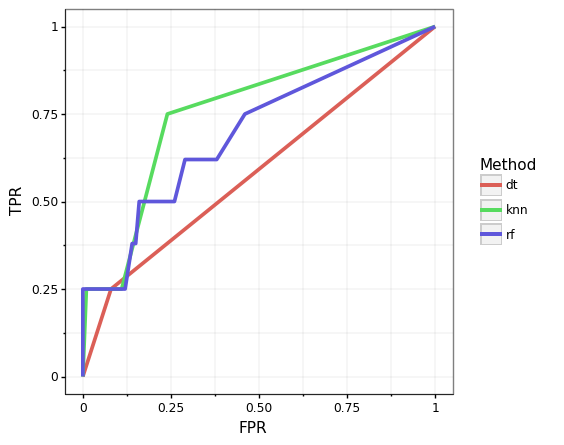

<ggplot: (-9223363275269925453)>

In [177]:
# plot corresponding ROCs using plot_roc()
##### YOUR CODE STARTS #####
plot_roc(dict({'dt': final_dt_roc_coordinates,
               'rf': final_rf_roc_coordinates,
               'knn': final_knn_roc_coordinates}))
##### YOUR CODE ENDS #####

<font color='red'>  **(Homework exercise 2- e)** Calculate and print AUC for each model (use *sklearn*). Compare resulting values to previously calculated accuracies. Comment on the difference that you observe. **(0.5 points)**</font> 

In [181]:
##### YOUR CODE STARTS #####
print(f"AUC of DT is {np.round(metrics.roc_auc_score(val['class'], predictions_dtr),2)}")
print(f"AUC of KNN is {np.round(metrics.roc_auc_score(val['class'], predictions_knn),2)}")
print(f"AUC of RF is {np.round(metrics.roc_auc_score(val['class'], predictions_rfc),2)}")
##### YOUR CODE ENDS #####

AUC of DT is 0.52
AUC of KNN is 0.55
AUC of RF is 0.47


Comment on the difference between AUC and accuracy here:

We have :


*   Accuracy of DT is 84%
*   Accuracy of KNN is 90%
*   Accuracy of RF is 85%

and
*   AUC of DT is 52%
*   AUC of KNN is 55%
*   AUC of RF is 47%

The accuracy is helpful to see our model in general. But what we see with the AUC, is how the TPR and FPR are in this misclassified predictions. Here, the KNN is more accurate and have a better AUC but actually, an AUC of 50% is never really good, because it means that our models can't distinguish between positive and negative class.


<font color='red'>  **(Homework exercise 2- f)** Add one or two more classifiers to the pool of three that we have explored above. Consult *sklearn*'s documentation: https://scikit-learn.org/stable/supervised_learning.html. Calculate accuracy for the new model(s) and visualise all ROCs together on the same plot (3 old models + new that you find). Calculate AUC for these classifieres. Try to find a model which would outperform the previous three.  **(1.5 points)**</font> 

In [191]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(1111) # random seed for consistency

##### YOUR CODE STARTS #####
svm = SVC()
svm.fit(train[['x1','x2']], train[['class']])
predictions_svm = svm.predict(val[['x1','x2']])

gboost = GradientBoostingClassifier()
gboost.fit(train[['x1','x2']], train[['class']])
predictions_gboost = gboost.predict(val[['x1','x2']])
##### YOUR CODE ENDS #####

In [193]:
##### YOUR CODE STARTS #####
print(f"Accuracy of SVM is {np.round(metrics.accuracy_score(val[['class']], predictions_svm),2)*100}%")
print(f"AUC of SVM is {np.round(metrics.roc_auc_score(val['class'], predictions_svm),2)*100}%")

print(f"Accuracy of GBoost is {np.round(metrics.accuracy_score(val[['class']], predictions_gboost),2)*100}%")
print(f"AUC of GBoost is {np.round(metrics.roc_auc_score(val['class'], predictions_gboost),2)*100}%")
##### YOUR CODE ENDS #####

Accuracy of SVM is 91.0%
AUC of SVM is 50.0%
Accuracy of GBoost is 89.0%
AUC of GBoost is 60.0%


So we found GBoost who is better than our previous model, with an AUC of 60%.